In [108]:
import pandas as pd
import numpy as np
import json
import gmaps
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import requests
from scipy.stats import linregress
#from census import Census
from config import gkey

gmaps.configure(api_key=gkey)


In [109]:
file = "Resources/Austin Data Set CSV.csv"
base_df = pd.read_csv(file)

# pd.set_option("display.max_rows", 15)

base_df.head()

,zpid,city,streetAddress,zipcode,description,latitude,longitude,propertyTaxRate,garageSpaces,hasAssociation,...,numOfMiddleSchools,numOfHighSchools,avgSchoolDistance,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories,homeImage
0,111373431,pflugerville,14424 Lake Victor Dr,78660,"14424 Lake Victor Dr, Pflugerville, TX 78660 i...",30.430632,-97.663078,1.98,2,True,...,1,1,1.266667,2.666667,1063,14,3.0,4,2,111373431_ffce26843283d3365c11d81b8e6bdc6f-p_f...
1,120900430,pflugerville,1104 Strickling Dr,78660,Absolutely GORGEOUS 4 Bedroom home with 2 full...,30.432672,-97.661697,1.98,2,True,...,1,1,1.400000,2.666667,1063,14,2.0,4,1,120900430_8255c127be8dcf0a1a18b7563d987088-p_f...
2,2084491383,pflugerville,1408 Fort Dessau Rd,78660,Under construction - estimated completion in A...,30.409748,-97.639771,1.98,0,True,...,1,1,1.200000,3.000000,1108,14,2.0,3,1,2084491383_a2ad649e1a7a098111dcea084a11c855-p_...
3,120901374,pflugerville,1025 Strickling Dr,78660,Absolutely darling one story home in charming ...,30.432112,-97.661659,1.98,2,True,...,1,1,1.400000,2.666667,1063,14,2.0,3,1,120901374_b469367a619da85b1f5ceb69b675d88e-p_f...
4,60134862,pflugerville,15005 Donna Jane Loop,78660,Brimming with appeal & warm livability! Sleek ...,30.437368,-97.656860,1.98,0,True,...,1,1,1.133333,4.000000,1223,14,3.0,3,2,60134862_b1a48a3df3f111e005bb913873e98ce2-p_f.jpg


In [110]:

base_df.city.unique()

array(['pflugerville', 'del valle', 'austin', 'driftwood', 'manor',
       'dripping springs', 'manchaca', 'west lake hills', 'road'],
      dtype=object)

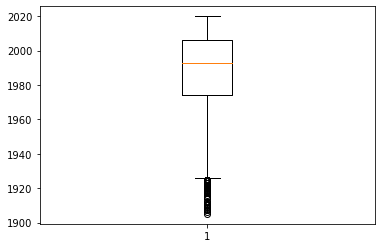

In [111]:
base_df.homeType.value_counts()
yearBuilt = base_df['yearBuilt']
#price = base_df['lot']
plt.boxplot(yearBuilt)
plt.show()

In [112]:

# we should rule out the outliers, below is a breakout that shows some homes have 27 rooms and 20 bathrooms.  

In [113]:
mask = base_df.city == 'austin'
newDf = base_df[mask].reset_index()
newDf.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15020 entries, 0 to 15019
Data columns (total 48 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   index                       15020 non-null  int64  
 1   zpid                        15020 non-null  int64  
 2   city                        15020 non-null  object 
 3   streetAddress               15020 non-null  object 
 4   zipcode                     15020 non-null  int64  
 5   description                 15020 non-null  object 
 6   latitude                    15020 non-null  float64
 7   longitude                   15020 non-null  float64
 8   propertyTaxRate             15020 non-null  float64
 9   garageSpaces                15020 non-null  int64  
 10  hasAssociation              15020 non-null  bool   
 11  hasCooling                  15020 non-null  bool   
 12  hasGarage                   15020 non-null  bool   
 13  hasHeating                  150

In [177]:
mask = newDf.lotSizeSqFt != 1508482800.0
cleanDf = newDf[mask]
cleanDf.describe()

,index,zpid,zipcode,latitude,longitude,propertyTaxRate,garageSpaces,parkingSpaces,yearBuilt,latestPrice,...,numOfElementarySchools,numOfMiddleSchools,numOfHighSchools,avgSchoolDistance,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories
count,15019.000000,1.501900e+04,15019.000000,15019.000000,15019.000000,15019.000000,15019.000000,15019.000000,15019.000000,1.501900e+04,...,15019.000000,15019.000000,15019.000000,15019.000000,15019.000000,15019.000000,15019.000000,15019.000000,15019.000000,15019.000000
mean,7645.484853,1.034826e+08,78736.921433,30.292187,-97.779470,1.994193,1.230441,1.225714,1988.347160,5.147095e+05,...,0.048805,1.035888,0.976896,1.840638,5.799901,1235.715361,14.866236,2.683431,3.439843,1.468274
std,4351.997721,3.169948e+08,15.841007,0.096616,0.083836,0.053351,1.351113,1.351738,21.569163,4.542934e+05,...,0.232988,0.264121,0.292056,1.064699,1.852850,326.527599,1.745192,1.055014,0.851327,0.524003
min,17.000000,2.858495e+07,78652.000000,30.085030,-98.022057,1.980000,0.000000,0.000000,1905.000000,5.500000e+03,...,0.000000,0.000000,0.000000,0.200000,2.333333,396.000000,10.000000,0.000000,0.000000,1.000000
25%,3888.500000,2.941047e+07,78727.000000,30.204472,-97.838570,1.980000,0.000000,0.000000,1974.000000,3.100000e+05,...,0.000000,1.000000,1.000000,1.100000,4.000000,966.000000,14.000000,2.000000,3.000000,1.000000
50%,7655.000000,2.949329e+07,78739.000000,30.285294,-97.770065,1.980000,1.000000,1.000000,1993.000000,4.090000e+05,...,0.000000,1.000000,1.000000,1.566667,6.000000,1287.000000,15.000000,3.000000,3.000000,1.000000
75%,11412.500000,7.033528e+07,78749.000000,30.366622,-97.719181,1.980000,2.000000,2.000000,2006.000000,5.750000e+05,...,0.000000,1.000000,1.000000,2.266667,7.000000,1494.000000,16.000000,3.000000,4.000000,2.000000
max,15170.000000,2.146313e+09,78759.000000,30.517323,-97.569504,2.210000,22.000000,22.000000,2020.000000,1.350000e+07,...,2.000000,3.000000,2.000000,7.700000,9.500000,1913.000000,19.000000,27.000000,20.000000,4.000000


In [144]:
squareFoot = cleanDf['lotSizeSqFt']
quartiles = squareFoot.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq



lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

mask = cleanDf['lotSizeSqFt'] < upper_bound
outlierGoneDf = cleanDf[mask]

latestPrice = cleanDf['latestPrice']
quartiles = latestPrice.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq



lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

mask = outlierGoneDf['latestPrice'] < upper_bound
outlierGoneDf = outlierGoneDf[mask]


Values below 0.0 could be outliers.
Values above 17424.0 could be outliers.
Values below -87500.0 could be outliers.
Values above 972500.0 could be outliers.


The r-squared is: 0.11677893523897122


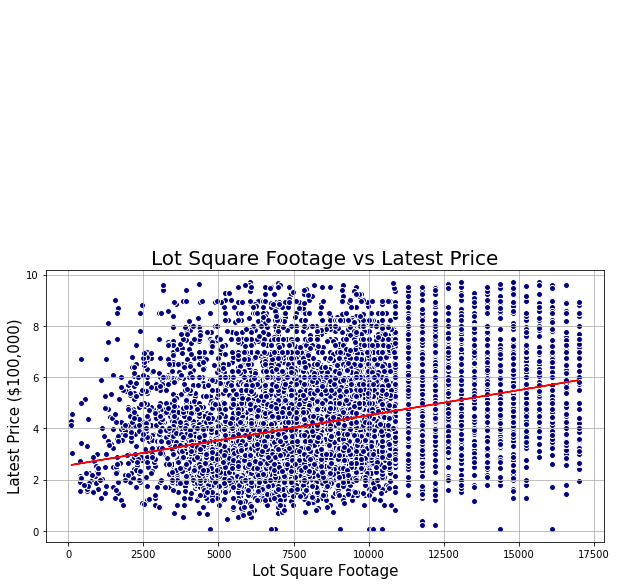

In [147]:
x_values = outlierGoneDf['lotSizeSqFt']
y_values = outlierGoneDf['latestPrice'] / 100000

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(10, 5))
plt.scatter(x_values,y_values, marker="o", facecolors="navy", edgecolors="white")
plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(-55,20),fontsize=15,color="red")
plt.title('Lot Square Footage vs Latest Price', fontsize=20)
plt.xlabel('Lot Square Footage', fontsize=15)
plt.ylabel('Latest Price ($100,000)', fontsize=15)
print(f"The r-squared is: {rvalue**2}")
plt.grid()
plt.show()


In [137]:
#CLean
outlierGoneDf = pd.DataFrame()

In [138]:
squareFoot = cleanDf['livingAreaSqFt']
quartiles = squareFoot.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq



lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

mask = cleanDf['livingAreaSqFt'] < upper_bound
outlierGoneDf = cleanDf[mask]

latestPrice = cleanDf['latestPrice']
quartiles = latestPrice.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq



lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

mask = outlierGoneDf['latestPrice'] < upper_bound
outlierGoneDf = outlierGoneDf[mask]

Values below -320.25 could be outliers.
Values above 4493.75 could be outliers.
Values below -87500.0 could be outliers.
Values above 972500.0 could be outliers.


The r-squared is: 0.2795590978796109


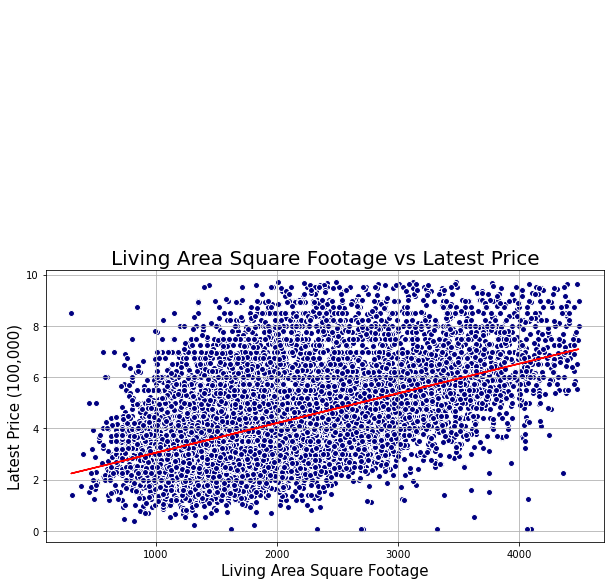

In [139]:
x_values = outlierGoneDf['livingAreaSqFt']
y_values = outlierGoneDf['latestPrice'] / 100000

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(10, 5))
plt.scatter(x_values,y_values, marker="o", facecolors="navy", edgecolors="white")
plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(-55,20),fontsize=15,color="red")
plt.title('Living Area Square Footage vs Latest Price', fontsize=20)
plt.xlabel('Living Area Square Footage', fontsize=15)
plt.ylabel('Latest Price (100,000)', fontsize=15)
print(f"The r-squared is: {rvalue**2}")
plt.grid()
plt.show()


In [140]:
#Clean
outlierGoneDf = pd.DataFrame()

The r-squared is: 0.008187884334956208


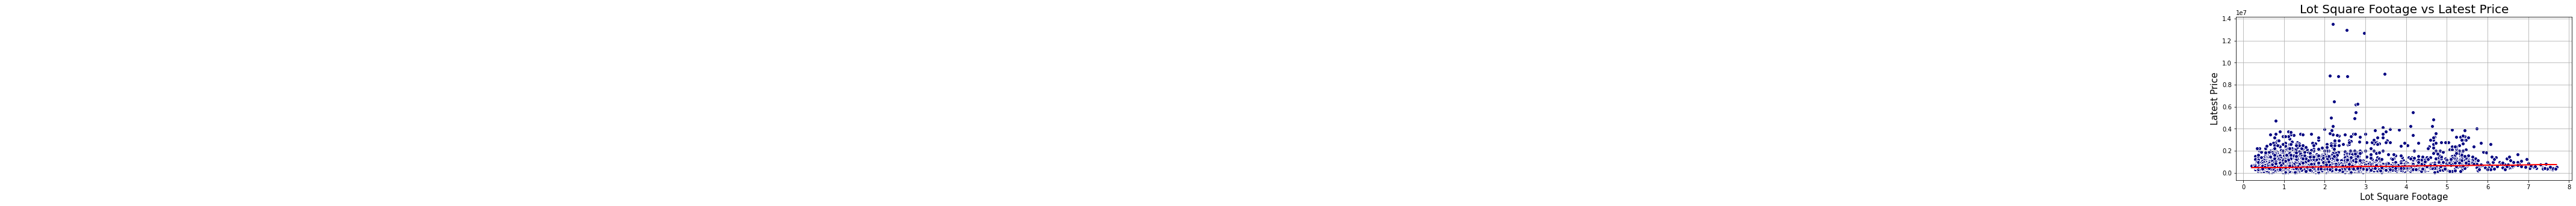

In [143]:
x_values = cleanDf['avgSchoolDistance']
y_values = cleanDf['latestPrice']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(10, 5))
plt.scatter(x_values,y_values, marker="o", facecolors="navy", edgecolors="white")
plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(-55,20),fontsize=15,color="red")
plt.title('Lot Square Footage vs Latest Price', fontsize=20)
plt.xlabel('Lot Square Footage', fontsize=15)
plt.ylabel('Latest Price', fontsize=15)
print(f"The r-squared is: {rvalue**2}")
plt.grid()
plt.show()

In [149]:
corr = cleanDf.corr()
corr

,index,zpid,zipcode,latitude,longitude,propertyTaxRate,garageSpaces,hasAssociation,hasCooling,hasGarage,...,numOfElementarySchools,numOfMiddleSchools,numOfHighSchools,avgSchoolDistance,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories
index,1.000000,-0.034746,-0.154915,-0.093213,0.149799,0.008704,-0.060752,-0.300518,-0.028607,0.006462,...,-0.175070,-0.206991,0.168948,-0.348782,-0.073763,-0.157177,-0.005165,-0.192260,-0.175171,-0.055149
zpid,-0.034746,1.000000,-0.049676,-0.057647,0.004445,-0.010914,-0.003147,0.105609,-0.052192,0.019745,...,-0.005667,-0.002575,0.016044,0.048069,-0.046556,-0.034794,-0.063753,0.053704,-0.038932,0.000045
zipcode,-0.154915,-0.049676,1.000000,-0.095812,-0.073496,-0.220567,-0.029873,0.045137,0.087694,-0.053010,...,0.086754,-0.024694,0.060863,0.014201,-0.006821,0.208909,0.097093,-0.074898,0.028623,-0.077245
latitude,-0.093213,-0.057647,-0.095812,1.000000,0.359819,0.453549,0.018304,-0.052899,0.041893,0.015984,...,0.126261,-0.018028,0.129248,-0.043974,0.259865,0.088073,-0.010138,0.054663,0.080054,0.044665
longitude,0.149799,0.004445,-0.073496,0.359819,1.000000,-0.009408,-0.113697,-0.314505,-0.063300,-0.030106,...,-0.033445,-0.218597,0.455043,-0.279133,-0.549842,-0.352046,-0.597185,-0.334516,-0.286055,-0.159857
propertyTaxRate,0.008704,-0.010914,-0.220567,0.453549,-0.009408,1.000000,0.026065,0.127324,0.034164,0.015572,...,-0.052036,-0.021596,-0.034123,-0.013564,0.183150,0.161133,-0.023461,0.065454,0.098356,0.057732
garageSpaces,-0.060752,-0.003147,-0.029873,0.018304,-0.113697,0.026065,1.000000,0.046093,0.062077,0.822054,...,0.027305,0.044557,-0.063961,0.077575,0.091128,0.036372,0.061673,0.198423,0.163868,0.096055
hasAssociation,-0.300518,0.105609,0.045137,-0.052899,-0.314505,0.127324,0.046093,1.000000,0.079938,0.006434,...,0.125918,0.114921,-0.026586,0.316668,0.309853,0.408884,0.245628,0.339640,0.227193,0.312459
hasCooling,-0.028607,-0.052192,0.087694,0.041893,-0.063300,0.034164,0.062077,0.079938,1.000000,0.056300,...,0.010966,0.010698,-0.005497,0.004030,0.070257,0.106671,0.092267,0.127126,0.119860,0.045590
hasGarage,0.006462,0.019745,-0.053010,0.015984,-0.030106,0.015572,0.822054,0.006434,0.056300,1.000000,...,0.002351,0.013681,-0.023281,0.010981,0.030971,-0.012638,0.008133,0.083895,0.054700,0.068356


<AxesSubplot:>

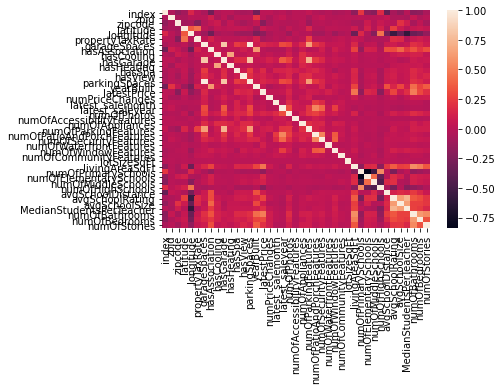

In [150]:
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [167]:
mask = cleanDf['latestPrice'] < 400000
lowerHouse = cleanDf[mask]
lowerHouse.describe()


,index,zpid,zipcode,latitude,longitude,propertyTaxRate,garageSpaces,parkingSpaces,yearBuilt,latestPrice,...,numOfElementarySchools,numOfMiddleSchools,numOfHighSchools,avgSchoolDistance,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories
count,7330.000000,7.330000e+03,7330.000000,7330.000000,7330.000000,7330.000000,7330.000000,7330.000000,7330.000000,7330.000000,...,7330.000000,7330.000000,7330.000000,7330.000000,7330.000000,7330.000000,7330.000000,7330.000000,7330.000000,7330.000000
mean,7454.093724,9.557340e+07,78740.461392,30.282020,-97.754186,1.996847,1.023192,1.020464,1988.219509,298776.333970,...,0.026603,1.007640,1.042701,1.800609,4.915888,1188.092906,14.196044,2.281985,3.183220,1.363711
std,3922.171037,2.941511e+08,13.575115,0.104385,0.080502,0.059090,1.204330,1.204379,19.112738,69739.190033,...,0.204937,0.136008,0.280254,0.924953,1.597674,325.566340,1.623326,0.705712,0.729936,0.486458
min,19.000000,2.858495e+07,78653.000000,30.085030,-98.020477,1.980000,0.000000,0.000000,1907.000000,5500.000000,...,0.000000,0.000000,0.000000,0.300000,2.333333,396.000000,10.000000,0.000000,0.000000,1.000000
25%,4107.500000,2.943871e+07,78729.000000,30.192233,-97.813688,1.980000,0.000000,0.000000,1975.000000,250000.000000,...,0.000000,1.000000,1.000000,1.133333,3.666667,925.000000,13.000000,2.000000,3.000000,1.000000
50%,7313.500000,2.950292e+07,78745.000000,30.255078,-97.749294,1.980000,1.000000,0.000000,1987.000000,307900.000000,...,0.000000,1.000000,1.000000,1.600000,4.666667,1189.000000,14.000000,2.000000,3.000000,1.000000
75%,10848.750000,7.033275e+07,78749.000000,30.370018,-97.691690,1.980000,2.000000,2.000000,2005.000000,350000.000000,...,0.000000,1.000000,1.000000,2.233333,6.000000,1476.000000,15.000000,3.000000,4.000000,2.000000
max,15170.000000,2.145703e+09,78759.000000,30.516279,-97.569504,2.210000,22.000000,22.000000,2020.000000,399999.000000,...,2.000000,3.000000,2.000000,7.666667,9.000000,1913.000000,18.000000,8.000000,20.000000,3.000000


In [168]:
mask = cleanDf['latestPrice'] >= 400000
upperHouse = cleanDf[mask]
upperHouse.describe()

,index,zpid,zipcode,latitude,longitude,propertyTaxRate,garageSpaces,parkingSpaces,yearBuilt,latestPrice,...,numOfElementarySchools,numOfMiddleSchools,numOfHighSchools,avgSchoolDistance,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories
count,7689.000000,7.689000e+03,7689.000000,7689.000000,7689.000000,7689.000000,7689.000000,7689.000000,7689.000000,7.689000e+03,...,7689.000000,7689.000000,7689.000000,7689.000000,7689.000000,7689.000000,7689.000000,7689.000000,7689.000000,7689.000000
mean,7827.939914,1.110224e+08,78733.546755,30.301880,-97.803574,1.991663,1.428014,1.421381,1988.468852,7.205607e+05,...,0.069970,1.062817,0.914163,1.878798,6.642639,1281.114319,15.505137,3.066133,3.684484,1.567954
std,4718.528831,3.371813e+08,17.063813,0.087491,0.079756,0.047099,1.450286,1.451914,23.675400,5.582849e+05,...,0.255113,0.342274,0.289279,1.181444,1.678537,320.948715,1.612744,1.182951,0.886111,0.538906
min,17.000000,2.858567e+07,78652.000000,30.115831,-98.022057,1.980000,0.000000,0.000000,1905.000000,4.000000e+05,...,0.000000,0.000000,0.000000,0.200000,2.333333,396.000000,10.000000,0.000000,0.000000,1.000000
25%,3397.000000,2.937252e+07,78723.000000,30.231934,-97.869186,1.980000,0.000000,0.000000,1972.000000,4.650000e+05,...,0.000000,1.000000,1.000000,1.066667,5.666667,1087.000000,15.000000,2.000000,3.000000,1.000000
50%,8026.000000,2.947459e+07,78735.000000,30.300112,-97.782059,1.980000,2.000000,2.000000,1995.000000,5.690000e+05,...,0.000000,1.000000,1.000000,1.500000,7.000000,1332.000000,16.000000,3.000000,4.000000,2.000000
75%,12528.000000,7.033740e+07,78748.000000,30.363478,-97.744202,1.980000,2.000000,2.000000,2007.000000,7.500000e+05,...,0.000000,1.000000,1.000000,2.333333,8.000000,1533.000000,16.000000,4.000000,4.000000,2.000000
max,15169.000000,2.146313e+09,78759.000000,30.517323,-97.578438,2.210000,20.000000,20.000000,2020.000000,1.350000e+07,...,1.000000,3.000000,2.000000,7.700000,9.500000,1913.000000,19.000000,27.000000,10.000000,4.000000


In [169]:
mask = upperHouse['latitude'] >=  30.305683
upperNorthHouse = upperHouse[mask]
upperNorthHouse.describe()

,index,zpid,zipcode,latitude,longitude,propertyTaxRate,garageSpaces,parkingSpaces,yearBuilt,latestPrice,...,numOfElementarySchools,numOfMiddleSchools,numOfHighSchools,avgSchoolDistance,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories
count,3710.000000,3.710000e+03,3710.000000,3710.000000,3710.000000,3710.000000,3710.000000,3710.00000,3710.000000,3.710000e+03,...,3710.000000,3710.000000,3710.000000,3710.000000,3710.000000,3710.000000,3710.000000,3710.000000,3710.000000,3710.000000
mean,6674.629380,8.621166e+07,78739.158221,30.378075,-97.783922,2.000768,1.454987,1.44690,1986.536658,7.355617e+05,...,0.108356,1.083019,0.931267,1.814746,7.094434,1354.852291,15.676819,3.134704,3.785714,1.588140
std,5039.086409,2.839335e+08,14.416990,0.051268,0.065068,0.065928,1.422197,1.42457,20.652333,6.565916e+05,...,0.310871,0.416831,0.258307,0.961388,1.435249,231.123218,1.133750,1.237637,0.877606,0.522525
min,17.000000,2.933775e+07,78703.000000,30.305717,-97.932671,1.980000,0.000000,0.00000,1912.000000,4.000000e+05,...,0.000000,0.000000,0.000000,0.366667,2.333333,569.000000,11.000000,0.000000,0.000000,1.000000
25%,2287.250000,2.936338e+07,78730.000000,30.339856,-97.826729,1.980000,0.000000,0.00000,1971.000000,4.749990e+05,...,0.000000,1.000000,1.000000,1.100000,7.000000,1177.000000,15.000000,2.000000,3.000000,1.000000
50%,5875.500000,2.941394e+07,78732.000000,30.365551,-97.767651,1.980000,2.000000,2.00000,1991.000000,5.790000e+05,...,0.000000,1.000000,1.000000,1.633333,7.000000,1381.000000,16.000000,3.000000,4.000000,2.000000
75%,11328.500000,5.830736e+07,78756.000000,30.417325,-97.736454,1.980000,2.000000,2.00000,2003.000000,7.615000e+05,...,0.000000,1.000000,1.000000,2.366667,8.333333,1523.000000,16.000000,4.000000,4.000000,2.000000
max,15162.000000,2.146313e+09,78759.000000,30.517323,-97.578438,2.210000,12.000000,12.00000,2020.000000,1.350000e+07,...,1.000000,3.000000,2.000000,5.666667,9.333333,1913.000000,17.000000,27.000000,8.000000,4.000000


In [170]:
mask = upperHouse['latitude'] <  30.305683
upperSouthHouse = upperHouse[mask]
upperSouthHouse.describe()

,index,zpid,zipcode,latitude,longitude,propertyTaxRate,garageSpaces,parkingSpaces,yearBuilt,latestPrice,...,numOfElementarySchools,numOfMiddleSchools,numOfHighSchools,avgSchoolDistance,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories
count,3979.000000,3.979000e+03,3979.000000,3979.000000,3979.000000,3979.000000,3979.000000,3979.000000,3979.000000,3.979000e+03,...,3979.000000,3979.000000,3979.000000,3979.000000,3979.000000,3979.000000,3979.000000,3979.000000,3979.000000,3979.000000
mean,8903.280975,1.341559e+08,78728.314652,30.230835,-97.821897,1.983174,1.402865,1.397587,1990.270420,7.065739e+05,...,0.034179,1.043981,0.898216,1.938520,6.221388,1212.361397,15.345062,3.002199,3.590098,1.549133
std,4117.837271,3.787439e+08,17.668830,0.043358,0.087464,0.009229,1.475730,1.476736,26.055347,4.472141e+05,...,0.181713,0.252341,0.314625,1.352191,1.776697,373.458966,1.942954,1.125979,0.883690,0.553145
min,51.000000,2.858567e+07,78652.000000,30.115831,-98.022057,1.980000,0.000000,0.000000,1905.000000,4.000000e+05,...,0.000000,0.000000,0.000000,0.200000,2.666667,396.000000,10.000000,0.000000,0.000000,1.000000
25%,5362.500000,2.939873e+07,78704.000000,30.192707,-97.886822,1.980000,0.000000,0.000000,1974.000000,4.599000e+05,...,0.000000,1.000000,1.000000,1.066667,4.666667,890.000000,14.000000,2.000000,3.000000,1.000000
50%,9609.000000,2.950207e+07,78737.000000,30.234232,-97.809891,1.980000,2.000000,2.000000,1999.000000,5.500000e+05,...,0.000000,1.000000,1.000000,1.433333,6.000000,1226.000000,16.000000,3.000000,4.000000,2.000000
75%,12852.500000,8.010564e+07,78741.000000,30.264829,-97.755421,1.980000,2.000000,2.000000,2011.000000,7.475370e+05,...,0.000000,1.000000,1.000000,2.300000,7.333333,1600.000000,17.000000,4.000000,4.000000,2.000000
max,15169.000000,2.145191e+09,78751.000000,30.305628,-97.583115,2.010000,20.000000,20.000000,2020.000000,4.850000e+06,...,1.000000,3.000000,2.000000,7.700000,9.500000,1755.000000,19.000000,10.000000,10.000000,4.000000


In [171]:
mask = lowerHouse['latitude'] >= 30.282020
lowerNorthHouse = lowerHouse[mask]
lowerNorthHouse.describe()

,index,zpid,zipcode,latitude,longitude,propertyTaxRate,garageSpaces,parkingSpaces,yearBuilt,latestPrice,...,numOfElementarySchools,numOfMiddleSchools,numOfHighSchools,avgSchoolDistance,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories
count,3287.000000,3.287000e+03,3287.000000,3287.000000,3287.000000,3287.000000,3287.000000,3287.000000,3287.000000,3287.000000,...,3287.000000,3287.000000,3287.000000,3287.000000,3287.000000,3287.000000,3287.000000,3287.000000,3287.000000,3287.000000
mean,7539.317615,7.122607e+07,78739.619106,30.385483,-97.711425,2.016456,1.009127,1.005476,1984.211743,299728.847581,...,0.046851,1.008823,1.111348,1.749563,5.279979,1155.332826,14.092181,2.259036,3.192577,1.342562
std,4032.158466,2.248041e+08,15.647762,0.057270,0.061055,0.084012,1.167073,1.167096,18.554723,71538.864315,...,0.283866,0.171585,0.347693,0.907710,1.700093,277.733073,1.581338,0.702269,0.786971,0.480374
min,42.000000,2.933002e+07,78653.000000,30.282030,-97.926910,1.980000,0.000000,0.000000,1920.000000,5500.000000,...,0.000000,0.000000,0.000000,0.366667,2.333333,480.000000,11.000000,0.000000,0.000000,1.000000
25%,3590.000000,2.941696e+07,78727.000000,30.346400,-97.744961,1.980000,0.000000,0.000000,1971.000000,250000.000000,...,0.000000,1.000000,1.000000,1.033333,4.000000,1019.000000,13.000000,2.000000,3.000000,1.000000
50%,8269.000000,2.944123e+07,78732.000000,30.375725,-97.698837,1.980000,1.000000,0.000000,1984.000000,309900.000000,...,0.000000,1.000000,1.000000,1.566667,5.000000,1073.000000,14.000000,2.000000,3.000000,1.000000
75%,10993.500000,5.830451e+07,78754.000000,30.429993,-97.674072,1.980000,2.000000,2.000000,1999.000000,359000.000000,...,0.000000,1.000000,1.000000,2.233333,6.666667,1381.000000,15.000000,3.000000,4.000000,2.000000
max,15163.000000,2.143442e+09,78759.000000,30.516279,-97.579430,2.210000,10.000000,10.000000,2020.000000,399999.000000,...,2.000000,3.000000,2.000000,6.000000,9.000000,1913.000000,17.000000,7.000000,20.000000,3.000000


In [172]:
mask = lowerHouse['latitude'] < 30.282020
lowerSouthHouse = lowerHouse[mask]
lowerSouthHouse.describe()

,index,zpid,zipcode,latitude,longitude,propertyTaxRate,garageSpaces,parkingSpaces,yearBuilt,latestPrice,...,numOfElementarySchools,numOfMiddleSchools,numOfHighSchools,avgSchoolDistance,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories
count,4043.000000,4.043000e+03,4043.000000,4043.000000,4043.000000,4043.000000,4043.000000,4043.000000,4043.000000,4043.000000,...,4043.000000,4043.000000,4043.000000,4043.000000,4043.000000,4043.000000,4043.000000,4043.000000,4043.000000,4043.000000
mean,7384.805837,1.153680e+08,78741.146179,30.197903,-97.788952,1.980905,1.034628,1.032649,1991.477863,298001.930744,...,0.010141,1.006678,0.986891,1.842109,4.619879,1214.727183,14.280485,2.300643,3.175612,1.380905
std,3829.527426,3.390121e+08,11.577703,0.036172,0.077615,0.005133,1.233817,1.233871,18.941842,68240.167870,...,0.100203,0.098000,0.192836,0.936803,1.443317,357.627854,1.652067,0.708037,0.680054,0.490737
min,19.000000,2.858495e+07,78702.000000,30.085030,-98.020477,1.980000,0.000000,0.000000,1907.000000,6000.000000,...,0.000000,0.000000,0.000000,0.300000,2.666667,396.000000,10.000000,0.000000,0.000000,1.000000
25%,4973.500000,2.948876e+07,78741.000000,30.168521,-97.837498,1.980000,0.000000,0.000000,1979.000000,250000.000000,...,0.000000,1.000000,1.000000,1.200000,3.333333,887.000000,13.000000,2.000000,3.000000,1.000000
50%,6933.000000,2.951144e+07,78745.000000,30.196360,-97.798073,1.980000,0.000000,0.000000,1995.000000,302599.000000,...,0.000000,1.000000,1.000000,1.633333,4.000000,1409.000000,14.000000,2.000000,3.000000,1.000000
75%,10517.500000,7.035748e+07,78748.000000,30.220411,-97.742214,1.980000,2.000000,2.000000,2006.000000,350000.000000,...,0.000000,1.000000,1.000000,2.233333,5.333333,1506.000000,15.000000,3.000000,4.000000,2.000000
max,15170.000000,2.145703e+09,78749.000000,30.281940,-97.569504,2.010000,22.000000,22.000000,2020.000000,399999.000000,...,1.000000,2.000000,2.000000,7.666667,9.000000,1755.000000,18.000000,8.000000,8.000000,3.000000


In [173]:
mask = upperNorthHouse['longitude'] >= -97.783922
upperNorthEastHouse = upperNorthHouse[mask]
upperNorthEastHouse.describe()

,index,zpid,zipcode,latitude,longitude,propertyTaxRate,garageSpaces,parkingSpaces,yearBuilt,latestPrice,...,numOfElementarySchools,numOfMiddleSchools,numOfHighSchools,avgSchoolDistance,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories
count,2220.000000,2.220000e+03,2220.000000,2220.000000,2220.000000,2220.000000,2220.000000,2220.000000,2220.000000,2.220000e+03,...,2220.000000,2220.000000,2220.000000,2220.000000,2220.000000,2220.000000,2220.000000,2220.000000,2220.000000,2220.000000
mean,9471.945946,7.344103e+07,78742.004505,30.377221,-97.739375,2.009113,1.332883,1.322973,1978.728378,6.525474e+05,...,0.005405,0.994144,0.993243,1.453362,6.479485,1285.841892,15.455856,2.746059,3.559910,1.456306
std,4387.952853,2.535432e+08,16.587539,0.056892,0.029241,0.076492,1.356805,1.358867,21.706897,5.152423e+05,...,0.073339,0.076316,0.105928,0.735759,1.450193,255.099662,1.162869,1.110431,0.853124,0.524635
min,1721.000000,2.933775e+07,78703.000000,30.305717,-97.783913,1.980000,0.000000,0.000000,1912.000000,4.000000e+05,...,0.000000,0.000000,0.000000,0.366667,2.333333,569.000000,11.000000,0.000000,0.000000,1.000000
25%,7799.750000,2.936914e+07,78727.000000,30.333085,-97.763090,1.980000,0.000000,0.000000,1962.000000,4.500000e+05,...,0.000000,1.000000,1.000000,0.900000,6.000000,1153.000000,15.000000,2.000000,3.000000,1.000000
50%,8811.500000,2.941660e+07,78751.000000,30.360971,-97.744522,1.980000,2.000000,2.000000,1977.000000,5.390000e+05,...,0.000000,1.000000,1.000000,1.266667,7.000000,1196.000000,16.000000,3.000000,3.000000,1.000000
75%,14304.000000,2.954811e+07,78757.000000,30.417255,-97.723118,1.980000,2.000000,2.000000,1996.250000,6.990000e+05,...,0.000000,1.000000,1.000000,1.834574,7.000000,1486.000000,16.000000,3.000000,4.000000,2.000000
max,15162.000000,2.144047e+09,78759.000000,30.517323,-97.578438,2.210000,12.000000,12.000000,2020.000000,1.300000e+07,...,1.000000,1.000000,2.000000,4.133333,9.000000,1913.000000,17.000000,27.000000,8.000000,4.000000


In [174]:
mask = upperNorthHouse['longitude'] < -97.783922
upperNorthWestHouse = upperNorthHouse[mask]
upperNorthWestHouse.describe()

,index,zpid,zipcode,latitude,longitude,propertyTaxRate,garageSpaces,parkingSpaces,yearBuilt,latestPrice,...,numOfElementarySchools,numOfMiddleSchools,numOfHighSchools,avgSchoolDistance,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories
count,1490.000000,1.490000e+03,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1.490000e+03,...,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000
mean,2506.815436,1.052390e+08,78734.917450,30.379347,-97.850292,1.988336,1.636913,1.631544,1998.170470,8.592474e+05,...,0.261745,1.215436,0.838926,2.353182,8.010667,1457.673154,16.006040,3.713758,4.122148,1.784564
std,2346.955203,3.231237e+08,8.810475,0.041485,0.043650,0.042999,1.496486,1.498761,11.571389,8.078756e+05,...,0.439732,0.628325,0.367722,1.005349,0.770197,135.649530,1.002665,1.190450,0.802853,0.453214
min,17.000000,2.933940e+07,78717.000000,30.308285,-97.932671,1.980000,0.000000,0.000000,1929.000000,4.000000e+05,...,0.000000,0.000000,0.000000,0.533333,5.778694,1177.000000,14.000000,0.000000,0.000000,1.000000
25%,813.000000,2.935928e+07,78730.000000,30.348497,-97.893610,1.980000,0.000000,0.000000,1991.000000,5.249250e+05,...,0.000000,1.000000,1.000000,1.700000,7.000000,1373.000000,16.000000,3.000000,4.000000,2.000000
50%,1554.500000,2.937588e+07,78732.000000,30.371550,-97.850887,1.980000,2.000000,2.000000,2000.000000,6.500000e+05,...,0.000000,1.000000,1.000000,2.200000,8.333333,1476.000000,16.000000,4.000000,4.000000,2.000000
75%,2732.750000,7.998015e+07,78733.000000,30.417219,-97.806826,1.980000,3.000000,3.000000,2006.000000,8.750000e+05,...,1.000000,1.000000,1.000000,2.766667,8.666667,1533.000000,17.000000,4.000000,5.000000,2.000000
max,14310.000000,2.146313e+09,78759.000000,30.499170,-97.783966,2.210000,9.000000,9.000000,2020.000000,1.350000e+07,...,1.000000,3.000000,1.000000,5.666667,9.333333,1715.000000,17.000000,13.000000,7.000000,3.000000


In [176]:
mask = upperSouthHouse['longitude'] >= -97.821897
upperSouthEastHouse = upperSouthHouse[mask]
upperSouthEastHouse.describe()

,index,zpid,zipcode,latitude,longitude,propertyTaxRate,garageSpaces,parkingSpaces,yearBuilt,latestPrice,...,numOfElementarySchools,numOfMiddleSchools,numOfHighSchools,avgSchoolDistance,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories
count,2069.000000,2.069000e+03,2069.000000,2069.000000,2069.000000,2.069000e+03,2069.000000,2069.000000,2069.000000,2.069000e+03,...,2069.000000,2069.000000,2069.000000,2069.000000,2069.000000,2069.000000,2069.000000,2069.000000,2069.000000,2069.000000
mean,10460.088932,1.570946e+08,78717.282745,30.254879,-97.749509,1.980000e+00,1.314161,1.312711,1980.929918,7.814201e+05,...,0.046883,0.996133,0.959401,1.306447,5.223488,1022.260029,14.073465,2.702513,3.262929,1.524891
std,3110.403496,4.434290e+08,17.835640,0.035399,0.038185,1.665737e-14,1.321192,1.321719,31.591818,4.790241e+05,...,0.211438,0.062077,0.231250,0.640537,1.555139,298.451570,1.626490,1.098293,0.891874,0.592493
min,51.000000,2.932187e+07,78701.000000,30.115831,-97.821808,1.980000e+00,0.000000,0.000000,1905.000000,4.000000e+05,...,0.000000,0.000000,0.000000,0.266667,2.666667,396.000000,10.000000,0.000000,0.000000,1.000000
25%,9362.000000,2.938402e+07,78704.000000,30.237232,-97.777084,1.980000e+00,0.000000,0.000000,1954.000000,4.750000e+05,...,0.000000,1.000000,1.000000,0.900000,4.000000,861.000000,13.000000,2.000000,3.000000,1.000000
50%,10228.000000,2.947239e+07,78704.000000,30.255407,-97.757256,1.980000e+00,1.000000,1.000000,1979.000000,6.200000e+05,...,0.000000,1.000000,1.000000,1.166667,5.000000,966.000000,14.000000,3.000000,3.000000,1.000000
75%,13436.000000,7.033841e+07,78741.000000,30.283884,-97.719414,1.980000e+00,2.000000,2.000000,2014.000000,8.750000e+05,...,0.000000,1.000000,1.000000,1.566667,6.666667,1226.000000,15.000000,3.000000,4.000000,2.000000
max,15169.000000,2.145191e+09,78751.000000,30.305628,-97.583115,1.980000e+00,12.000000,12.000000,2020.000000,4.745000e+06,...,1.000000,1.000000,2.000000,6.466667,9.500000,1669.000000,16.000000,8.000000,8.000000,4.000000


In [178]:
mask = upperSouthHouse['longitude'] < -97.821897
upperSouthWestHouse = upperSouthHouse[mask]
upperSouthWestHouse.describe()

,index,zpid,zipcode,latitude,longitude,propertyTaxRate,garageSpaces,parkingSpaces,yearBuilt,latestPrice,...,numOfElementarySchools,numOfMiddleSchools,numOfHighSchools,avgSchoolDistance,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories
count,1910.000000,1.910000e+03,1910.000000,1910.000000,1910.000000,1910.000000,1910.000000,1910.000000,1910.000000,1.910000e+03,...,1910.000000,1910.000000,1910.000000,1910.000000,1910.000000,1910.000000,1910.000000,1910.000000,1910.000000,1910.000000
mean,7216.874869,1.093076e+08,78740.264921,30.204791,-97.900312,1.986613,1.498953,1.489529,2000.388482,6.254971e+05,...,0.020419,1.095812,0.831937,2.623209,7.302359,1418.287958,16.722513,3.326832,3.944503,1.575393
std,4402.466621,2.910707e+08,5.581059,0.035423,0.050302,0.012439,1.621538,1.623442,11.683574,3.943846e+05,...,0.141465,0.351206,0.374020,1.569580,1.307520,335.477547,1.161846,1.064152,0.723807,0.505933
min,225.000000,2.858567e+07,78652.000000,30.129955,-98.022057,1.980000,0.000000,0.000000,1955.000000,4.000000e+05,...,0.000000,0.000000,0.000000,0.200000,3.333333,678.000000,12.000000,0.000000,0.000000,1.000000
25%,4380.250000,2.949171e+07,78737.000000,30.181880,-97.920527,1.980000,0.000000,0.000000,1994.000000,4.500000e+05,...,0.000000,1.000000,1.000000,1.333333,6.000000,1332.000000,16.000000,3.000000,4.000000,1.000000
50%,6141.500000,5.831546e+07,78739.000000,30.195457,-97.888721,1.980000,2.000000,2.000000,2002.000000,5.150000e+05,...,0.000000,1.000000,1.000000,2.166667,7.333333,1576.000000,17.000000,3.000000,4.000000,2.000000
75%,12591.500000,8.382448e+07,78748.000000,30.223396,-97.865742,1.980000,2.000000,2.000000,2009.000000,6.249000e+05,...,0.000000,1.000000,1.000000,3.591667,8.666667,1664.000000,18.000000,4.000000,4.000000,2.000000
max,15164.000000,2.120767e+09,78749.000000,30.303675,-97.821953,2.010000,20.000000,20.000000,2020.000000,4.850000e+06,...,1.000000,3.000000,1.000000,7.700000,9.500000,1755.000000,19.000000,10.000000,10.000000,3.000000


In [ ]:
#clean
    #upper(over 400,000) 
        #North
            #East
            #West
        #South
            #East
            #West
    #lower(under 400,000) 
        #North
            #East
            #West
        #South
            #East
            #West

In [189]:
mask = lowerSouthHouse['longitude'] >= -97.788952
lowerSouthEast = lowerSouthHouse[mask]
lowerSouthEast.describe()

,index,zpid,zipcode,latitude,longitude,propertyTaxRate,garageSpaces,parkingSpaces,yearBuilt,latestPrice,...,numOfElementarySchools,numOfMiddleSchools,numOfHighSchools,avgSchoolDistance,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories
count,1774.000000,1.774000e+03,1774.000000,1774.000000,1774.000000,1.774000e+03,1774.000000,1774.00000,1774.000000,1774.000000,...,1774.000000,1774.000000,1774.000000,1774.000000,1774.000000,1774.000000,1774.000000,1774.000000,1774.000000,1774.000000
mean,6128.629087,1.399773e+08,78735.072153,30.208506,-97.721965,1.980000e+00,0.966742,0.96336,1990.236189,274524.717024,...,0.021984,0.997745,1.024803,1.997503,4.002977,1136.262120,13.356821,2.153326,3.078354,1.324690
std,4018.748674,3.734620e+08,14.831347,0.043901,0.057056,1.643593e-14,1.127275,1.12717,23.966630,71264.825991,...,0.146673,0.047444,0.172746,0.826672,0.975478,386.748636,1.359957,0.754118,0.757035,0.477927
min,19.000000,2.932222e+07,78702.000000,30.085030,-97.788925,1.980000e+00,0.000000,0.00000,1910.000000,6000.000000,...,0.000000,0.000000,0.000000,0.300000,2.666667,396.000000,10.000000,0.000000,0.000000,1.000000
25%,2163.250000,2.946788e+07,78725.000000,30.166964,-97.766439,1.980000e+00,0.000000,0.00000,1972.000000,225000.000000,...,0.000000,1.000000,1.000000,1.366667,3.333333,840.000000,12.000000,2.000000,3.000000,1.000000
50%,5605.000000,5.831305e+07,78744.000000,30.205511,-97.738201,1.980000e+00,0.000000,0.00000,2002.000000,274945.000000,...,0.000000,1.000000,1.000000,1.838296,3.666667,1287.000000,14.000000,2.000000,3.000000,1.000000
75%,10242.750000,8.383139e+07,78745.000000,30.240857,-97.694628,1.980000e+00,2.000000,2.00000,2010.000000,325000.000000,...,0.000000,1.000000,1.000000,2.633333,4.333333,1506.000000,14.000000,3.000000,3.000000,2.000000
max,15170.000000,2.142048e+09,78748.000000,30.281940,-97.569504,1.980000e+00,7.000000,7.00000,2020.000000,399999.000000,...,1.000000,1.000000,2.000000,5.366667,9.000000,1600.000000,16.000000,6.000000,8.000000,3.000000


In [190]:
mask = lowerSouthHouse['longitude'] < -97.788952
lowerSouthWest = lowerSouthHouse[mask]
lowerSouthWest.describe()

,index,zpid,zipcode,latitude,longitude,propertyTaxRate,garageSpaces,parkingSpaces,yearBuilt,latestPrice,...,numOfElementarySchools,numOfMiddleSchools,numOfHighSchools,avgSchoolDistance,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories
count,2269.000000,2.269000e+03,2269.000000,2269.000000,2269.000000,2269.000000,2269.000000,2269.000000,2269.000000,2269.000000,...,2269.000000,2269.000000,2269.000000,2269.000000,2269.000000,2269.000000,2269.000000,2269.000000,2269.000000,2269.000000
mean,8366.937858,9.612748e+07,78745.895108,30.189613,-97.841324,1.981613,1.087704,1.086822,1992.448656,316357.407669,...,0.000881,1.013662,0.957250,1.720616,5.102200,1276.074482,15.002644,2.415822,3.251653,1.424857
std,3363.260659,3.081366e+08,3.938294,0.025857,0.044016,0.006768,1.308894,1.308953,13.720556,59671.723707,...,0.029683,0.123472,0.202338,0.998076,1.561506,320.042824,1.493074,0.647006,0.602503,0.496211
min,482.000000,2.858495e+07,78735.000000,30.131126,-98.020477,1.980000,0.000000,0.000000,1907.000000,8000.000000,...,0.000000,0.000000,0.000000,0.400000,3.333333,743.000000,12.000000,0.000000,0.000000,1.000000
25%,5405.000000,2.949472e+07,78745.000000,30.168674,-97.854156,1.980000,0.000000,0.000000,1982.000000,279800.000000,...,0.000000,1.000000,1.000000,1.133333,3.666667,890.000000,14.000000,2.000000,3.000000,1.000000
50%,7076.000000,2.950980e+07,78748.000000,30.191002,-97.834206,1.980000,1.000000,1.000000,1994.000000,325000.000000,...,0.000000,1.000000,1.000000,1.433333,4.666667,1424.000000,15.000000,2.000000,3.000000,1.000000
75%,12197.000000,6.465798e+07,78748.000000,30.207644,-97.812141,1.980000,2.000000,2.000000,2004.000000,364900.000000,...,0.000000,1.000000,1.000000,1.866667,6.000000,1494.000000,16.000000,3.000000,4.000000,2.000000
max,15166.000000,2.145703e+09,78749.000000,30.281429,-97.788963,2.010000,22.000000,22.000000,2019.000000,399999.000000,...,1.000000,2.000000,1.000000,7.666667,9.000000,1755.000000,18.000000,8.000000,8.000000,3.000000
